In [2]:
pip install -r requirements.txt

  Using cached PyWavelets-0.5.2.tar.gz (4.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [20 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_

In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

**(1) Preprocessing: Detect face and eyes**

## When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.

In [4]:
img = cv2.imread("F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/test_images/0x0.jpg")

try:
    print(img.shape)
except AttributeError:
    print('AttributeError: value is', img)

(416, 416, 3)


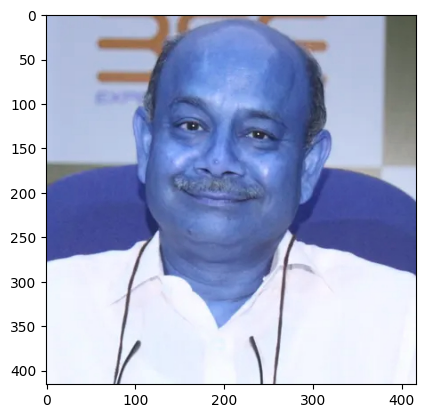

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(416, 416)

In [7]:
gray

array([[200, 200, 200, ...,  85,  85,  85],
       [200, 200, 200, ...,  85,  85,  85],
       [200, 200, 200, ...,  85,  85,  85],
       ...,
       [249, 249, 249, ..., 248, 248, 248],
       [249, 249, 249, ..., 248, 248, 248],
       [249, 249, 249, ..., 248, 248, 248]], dtype=uint8)

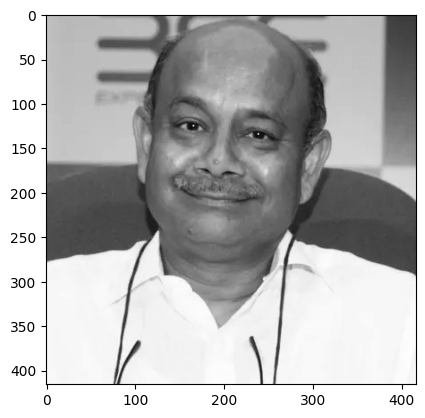

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/opencv/haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/opencv/haarcascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 99,  57, 200, 200]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(99, 57, 200, 200)

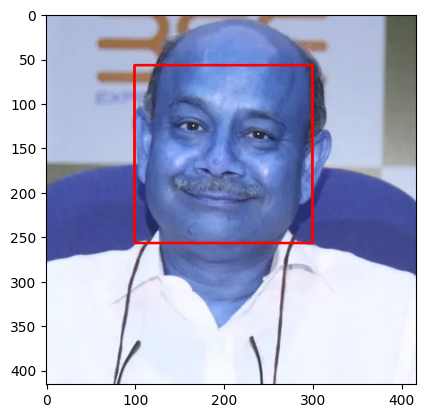

In [11]:
# draw a red rectangle over an image with given dimensions
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

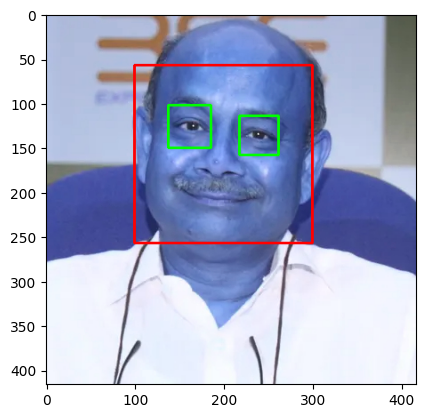

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:   # iterating through all faces
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  # in each face, i create red rectangle 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)  # eye_cascade will give you eye 
    for (ex,ey,ew,eh) in eyes: #might have multiple eyes
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # then create green rectangle over eyes
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

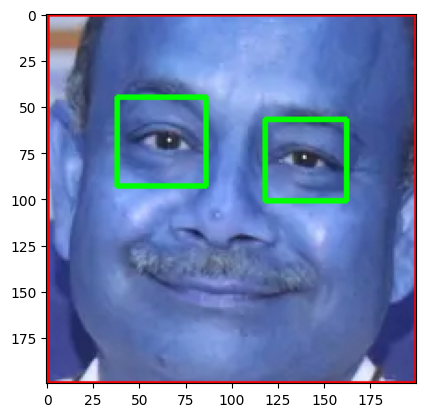

In [13]:
#crop image 
%matplotlib inline
plt.imshow(roi_color, cmap='gray') #roi stands for region of interest

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path) # read the image 
    if img is not None:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert image into gray color
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)  # detected the face
            for (x,y,w,h) in faces:   # iterating through all faces
                face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  # in each face, i create red rectangle 
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = img[y:y+h, x:x+w]
                eyes = eye_cascade.detectMultiScale(roi_gray)  # eye_cascade will give you eye 
                if len(eyes) >= 2: # if no of eyes we get is less than 2 then it will return region of interest
                    return roi_color    

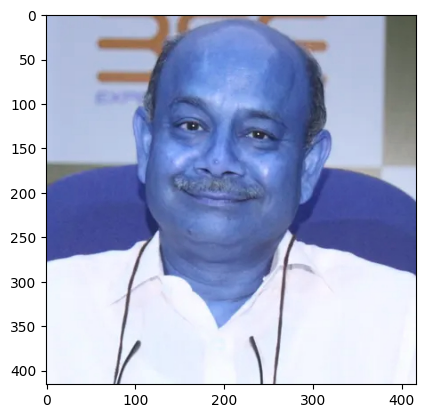

In [15]:
original_image = cv2.imread('F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/test_images/0x0.jpg')
plt.imshow(original_image) # return original image

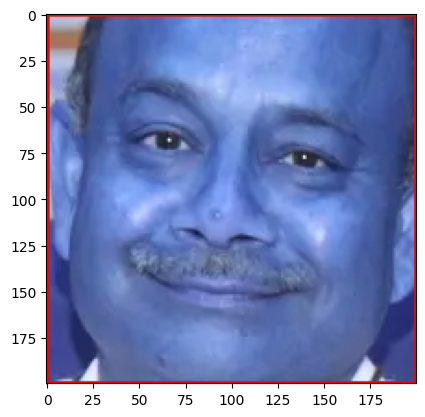

In [16]:
cropped_image = get_cropped_image_if_2_eyes('F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/test_images/0x0.jpg')
plt.imshow(cropped_image)  # return cropped image

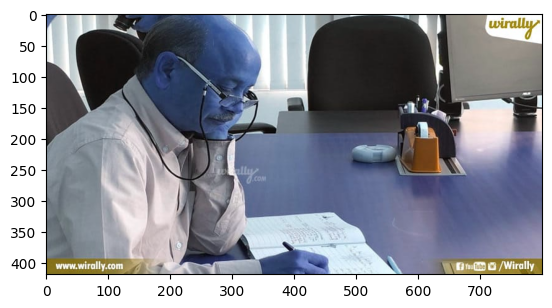

In [17]:
org_image_obstructed = cv2.imread('F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/test_images/4-d-mart.jpg')
plt.imshow(org_image_obstructed)

In [18]:
cropped_image_if_no_2_eyes = get_cropped_image_if_2_eyes('F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/test_images/4-d-mart.jpg')
cropped_image_if_no_2_eyes

In [28]:
path_to_dataset = "F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/"
path_to_cr_data = "F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/"

In [29]:
# let us store a path of all sub folders in python list 
import os
img_dirs = []
for entry in os.scandir(path_to_dataset): #(os.scandir() will go all the subdirectories of the dataset folders)
    if entry.is_dir():
        img_dirs.append(entry.path)  #(Those names will store in img_dirs variables)

In [30]:
img_dirs

['F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/Ashish Dhawan',
 'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/ashish kacholia',
 'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/Raamdeo Agrawal',
 'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/Radhakrishnan Damani',
 'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/Rakesh Jhunjhunwala',
 'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/Ramesh Damani',
 'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/Sunil Singhania',
 'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/Vijay Kedia']

In [22]:
pip install pytest-shutil

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
import shutil
if os.path.exists(path_to_cr_data):  #if folder is exist
    shutil.rmtree(path_to_cr_data) #it will remove the folder
os.mkdir(path_to_cr_data) # it will create a new folder

In [32]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]  #split the directory into 2 tokens
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir): # give the iterator which will go through each image of the folder
        roi_color = get_cropped_image_if_2_eyes(entry.path) #will give cropped image if it will get proper 2 eyes of image 
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped image in the folder:",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color) 
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1                

Ashish Dhawan
Generating cropped image in the folder: F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/Ashish Dhawan
ashish kacholia
Generating cropped image in the folder: F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/ashish kacholia
Raamdeo Agrawal
Generating cropped image in the folder: F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/Raamdeo Agrawal
Radhakrishnan Damani
Generating cropped image in the folder: F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/Radhakrishnan Damani
Rakesh Jhunjhunwala
Generating cropped image in the folder: F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/Rakesh Jhunjhunwala
Ramesh Damani
Generating cropped image in the folder: F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/dataset

## Preprocessing: Use wavelet transform as a feature for traning our model

## In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

## Wavelet transform

In [33]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
import numpy as np
import pywt
import cv2

def w2d(img,mode = 'haar', level=1):  # this function will generate wavelength image of the raw image
    imArray = img # Datatype conversion
    imArray = cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY) # Convert to Grayscale
    imArray = np.float32(imArray) # Convert to float
    imArray /= 255; 
    coeffs = pywt.wavedec2(imArray, mode, level=level) # Compute coefficients

    coeffs_H = list(coeffs) # process codefficients
    coeffs_H[0] *= 0;

    imArray_H = pywt.waverec2(coeffs_H,mode); # reconstruction
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H    

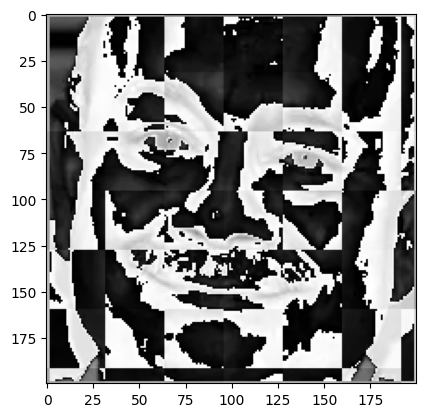

In [35]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap = 'gray')

In [36]:
celebrity_file_names_dict

{'Ashish Dhawan': ['F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/Ashish Dhawan/Ashish Dhawan1.png',
  'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/Ashish Dhawan/Ashish Dhawan2.png',
  'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/Ashish Dhawan/Ashish Dhawan3.png',
  'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/Ashish Dhawan/Ashish Dhawan4.png',
  'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/Ashish Dhawan/Ashish Dhawan5.png',
  'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/Ashish Dhawan/Ashish Dhawan6.png',
  'F:/Python/jupyter_projects/Machine Learning Projects/Image_Classification/Model/datasets/cropped/Ashish Dhawan/Ashish Dhawan7.png',
  'F:/Python/jupyter_projects/Machine 

In [37]:
# just assigned a random number to folder 
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1 
class_dict

{'Ashish Dhawan': 0,
 'ashish kacholia': 1,
 'Raamdeo Agrawal': 2,
 'Radhakrishnan Damani': 3,
 'Rakesh Jhunjhunwala': 4,
 'Ramesh Damani': 5,
 'Sunil Singhania': 6,
 'Vijay Kedia': 7}

## Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [38]:
X = []
y = []
for celebrity_name,training_files in celebrity_file_names_dict.items(): #training_image is stock images 
    for training_image in training_files: #first loop is iterate the stock trader, second loop will iterate through every image of that stock trader
        img = cv2.imread(training_image)  # read the image using opencv
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))  # resizing the image because every image is not same height and width
                                                    # So for our model training , we have to scall the image and the resize it in given dimensions
        img_har = w2d(img,'db1',5)  # will convert image into wavlength image
        scalled_img_har = cv2.resize(img_har, (32,32))  #scaled the wavelength image 
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #numpy has function named vstack which will stack image and 
                                                                                    # wavelength in vertical postion for colorful image - 32*32*3,1
        X.append(combined_img)   
        y.append(class_dict[celebrity_name])  

In [39]:
len(X[0])

4096

In [40]:
X[0]

array([[204],
       [204],
       [204],
       ...,
       [ 21],
       [ 41],
       [ 41]], dtype=uint8)

In [41]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(437, 4096)

In [42]:
X[0]

array([204., 204., 204., ...,  21.,  41.,  41.])

## Data Cleaning process is Done. Now we are ready to train our model.

## We will use SVM with rbf kernel tuned with heuristic finetuning

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  # split x and y into X_train, y_train, X_test, y_test

pipe = Pipeline([('scalar', StandardScaler()), ('svc',SVC(kernel = 'rbf', C = 10))])# to create sk pipeline, reason for this is to scale the data first.
# whatever X_train we are giving , we are scaling it with StandardScaler() function
# in 2nd step we are creating SVM with certain parameters , these parameters are randomly choosen
pipe.fit(X_train, y_train) # fit will train the machine learning model on X_train, y_train
pipe.score(X_test, y_test) # checking the score on X_test, y_test. TO check how good your model is performing

0.7636363636363637

In [46]:
print(classification_report(y_test, pipe.predict(X_test))) #classification_report try to predict y_test using X_test then it will comapare x_test and
                                                           #y_test,then it will give report in different metrices. 

              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       1.00      0.92      0.96        12
           2       1.00      0.29      0.44         7
           3       0.76      0.89      0.82        28
           4       0.62      0.50      0.56        10
           5       0.55      0.67      0.60         9
           6       0.83      0.79      0.81        19
           7       1.00      0.80      0.89        10

    accuracy                           0.76       110
   macro avg       0.80      0.71      0.72       110
weighted avg       0.79      0.76      0.76       110



**Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters**

In [48]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
#try to implement three models with given parameters
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [53]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])  # create pipeline to scale the data, then use the model to train the data
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False) # in gridsearchCV, we are using 5 cross-fold
    clf.fit(X_train, y_train)
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_ # appending the scores 
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.850070,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.626667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.871375,{'logisticregression__C': 1}


In [54]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [55]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [56]:
best_estimators['svm'].score(X_test, y_test)

0.8181818181818182

In [57]:
best_estimators['random_forest']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=10))])

In [58]:
best_estimators['random_forest'].score(X_test, y_test)

0.6727272727272727

In [59]:
best_estimators['logistic_regression']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [60]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8818181818181818

In [62]:
best_clf = best_estimators['svm']

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[14,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  3,  0,  0,  2,  1,  0],
       [ 0,  0,  0, 25,  2,  1,  0,  0],
       [ 0,  0,  0,  2,  6,  1,  1,  0],
       [ 1,  0,  0,  2,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  2, 17,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

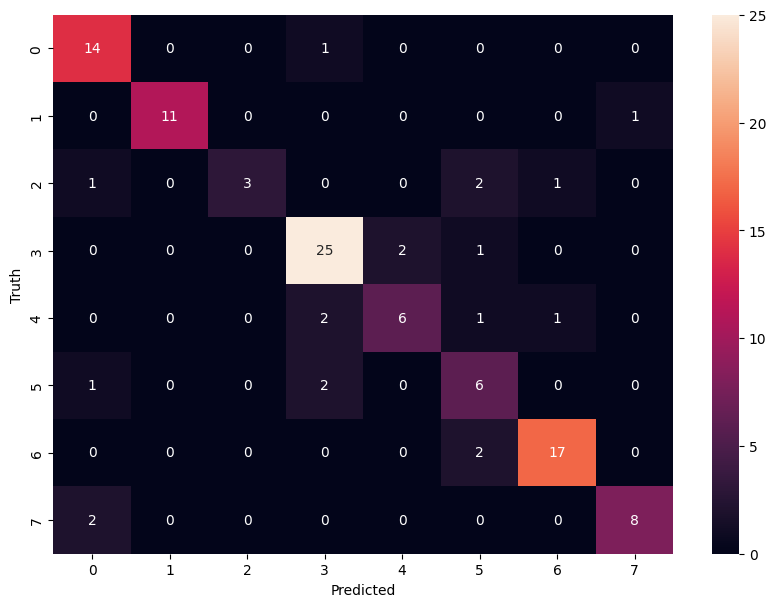

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# chart will tell us following thing:-
# 1) colorful digits showing no. of times correct prediction 
# 2) b&w tell no of time incorrect name 

In [65]:
class_dict

{'Ashish Dhawan': 0,
 'ashish kacholia': 1,
 'Raamdeo Agrawal': 2,
 'Radhakrishnan Damani': 3,
 'Rakesh Jhunjhunwala': 4,
 'Ramesh Damani': 5,
 'Sunil Singhania': 6,
 'Vijay Kedia': 7}

## Save the trained model

In [66]:
!pip install joblib
import joblib
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


['saved_model.pkl']

## Save class dictionary

In [67]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))